In [ ]:
pip install qiskit qiskit_optimization pylatexenc 

In [8]:
from qiskit import QuantumRegister, QuantumCircuit, BasicAer, Aer, execute
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram
from qiskit.algorithms import Grover, AmplificationProblem

# Let's construct the Grover’s algorithm at gate level to search the state |110>.
Then let's do the same with the Grover’s function that Qiskit provides.

### First, let's perform Grover's algorithm for 3 qubits to search the state $|110\rangle$:

\begin{equation*}
U_w = 
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 
\end{pmatrix}
\end{equation*}

In [21]:
# Let's construct the circuit for this oracle
U = Operator([[1,0,0,0,0,0,0,0], [0,1,0,0,0,0,0,0], [0,0,1,0,0,0,0,0], [0,0,0,1,0,0,0,0], [0,0,0,0,1,0,0,0], [0,0,0,0,0,1,0,0], [0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,1]])
U

Operator([[ 1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  1.+0.j,  0.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j,
            0.+0.j],
          [ 0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,  0.+0.j,
            1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


In [10]:
U.is_unitary()

True

### Once we know the matrix is unitary, therefore a valid quantum operator, we can convert our Oracle into a Quantum Circuit
### Let's build it and run some tests.
#### We'll build the oracle, send the state 110 through it and observe that the phase changes

/usr/local/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


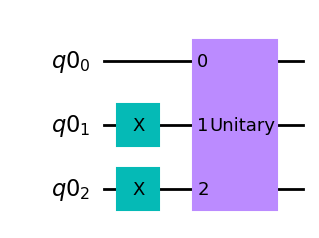

In [11]:
num_qubits = 3
qr = QuantumRegister(num_qubits)

qcirc = QuantumCircuit(qr)
# state 110 (qiskit prints them from bottom to top)
qcirc.x(1)
qcirc.x(2)
qcirc.append(U, qr)
qcirc.draw('mpl')

#### Observe the -1 in the 7th position of the array.

In [13]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qcirc, backend)
result = job.result()
state = result.get_statevector()
print(state)

[ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]


### Now that we created the oracle, let's build the main circuit

In [23]:
def get_search_iteration_circuit_110(num_qubits = 3):
  qr = QuantumRegister(num_qubits)
  qcirc = QuantumCircuit(qr)
  
  qcirc.append(U, qr)

  qcirc.barrier()
  # Diffuser operator to amplify the amplitude
  for qubit in range(num_qubits):
      qcirc.h(qubit)
  for qubit in range(num_qubits):
      qcirc.x(qubit)
  qcirc.h(num_qubits-1)
  qcirc.mct(list(range(num_qubits-1)), num_qubits-1)
  qcirc.h(num_qubits-1)
  for qubit in range(num_qubits):
      qcirc.x(qubit)
  for qubit in range(num_qubits):
      qcirc.h(qubit)
  
  return qcirc


/var/folders/30/l254mpr145b28rqcsd2l7l0w0000gn/T/ipykernel_80397/2424322119.py:14: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qcirc.mct(list(range(num_qubits-1)), num_qubits-1)
/usr/local/lib/python3.11/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


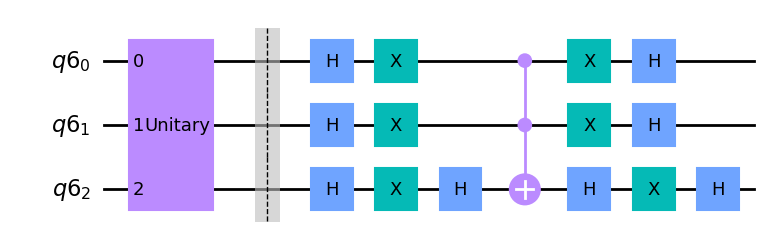

In [24]:
c = get_search_iteration_circuit_110()
c.draw('mpl')

In [29]:
def search_for_110(num_iterations):
  qr = QuantumRegister(num_qubits)
  circuit = QuantumCircuit(qr)
  # Initializing the circuit
  for i in range(num_qubits):
      circuit.h(i)

  for i in range(num_iterations):
    circuit.append(get_search_iteration_circuit_110(), qr)
  circuit.measure_all()

  backend = BasicAer.get_backend('qasm_simulator')
  results = execute(circuit, backend=backend, shots=1024).result()
  answer = results.get_counts()
  return answer

/var/folders/30/l254mpr145b28rqcsd2l7l0w0000gn/T/ipykernel_80397/2424322119.py:14: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qcirc.mct(list(range(num_qubits-1)), num_qubits-1)


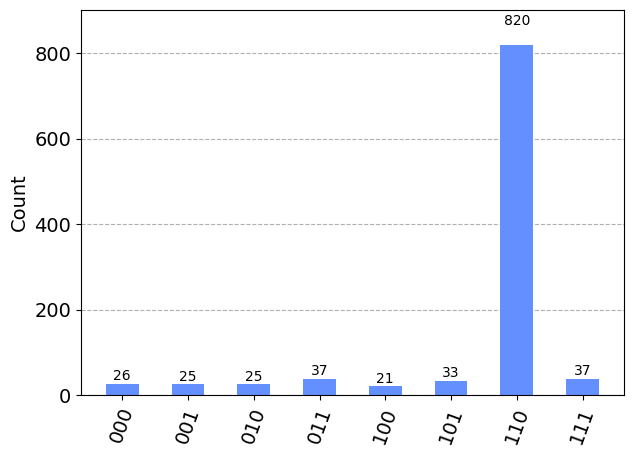

In [30]:
plot_histogram(search_for_110(1))

/var/folders/30/l254mpr145b28rqcsd2l7l0w0000gn/T/ipykernel_80397/2424322119.py:14: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qcirc.mct(list(range(num_qubits-1)), num_qubits-1)


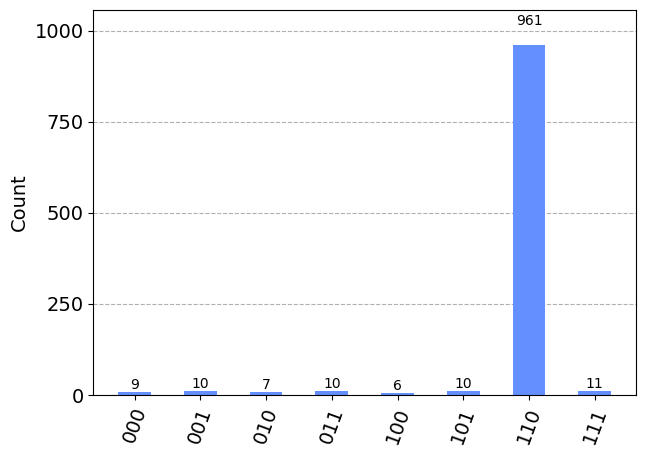

In [31]:
plot_histogram(search_for_110(2))

## Now let's do it with Qiskit functionalities

Ideal number of iterations:  [theory](https://learn.microsoft.com/en-us/azure/quantum/concepts-grovers#statement-of-the-problem)
 and [qiskit code](https://qiskit.org/ecosystem/algorithms/_modules/qiskit_algorithms/amplitude_amplifiers/grover.html#Grover.optimal_num_iterations) 

In [33]:
# First, we need to know how many iterations we need to carry out
iterations = Grover.optimal_num_iterations(num_solutions=1, num_qubits=3)
print(iterations)

2


In [35]:
DESIRED_STATE = '110'
# Implementing the oracle of the first step
oracle_qr = QuantumRegister(num_qubits)
oracle = QuantumCircuit(oracle_qr)
oracle.append(U, oracle_qr)

# The states we are searching for
good_states = [DESIRED_STATE]
grover_circuit = AmplificationProblem(oracle=oracle, is_good_state=good_states)
simulator = BasicAer.get_backend('qasm_simulator')
grover = Grover(quantum_instance=simulator)
result = grover.amplify(grover_circuit)

/var/folders/30/l254mpr145b28rqcsd2l7l0w0000gn/T/ipykernel_80397/2832586102.py:11: DeprecationWarning: ``qiskit.algorithms.amplitude_amplifiers.grover.Grover.__init__()``'s argument ``quantum_instance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the ``sampler`` argument. See https://qisk.it/algo_migration for a migration guide.
  grover = Grover(quantum_instance=simulator)


In [37]:
simulator = BasicAer.get_backend('qasm_simulator')
grover = Grover(quantum_instance=simulator)
result = grover.amplify(grover_circuit)

/var/folders/30/l254mpr145b28rqcsd2l7l0w0000gn/T/ipykernel_80397/1817408542.py:2: DeprecationWarning: ``qiskit.algorithms.amplitude_amplifiers.grover.Grover.__init__()``'s argument ``quantum_instance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. Instead, use the ``sampler`` argument. See https://qisk.it/algo_migration for a migration guide.
  grover = Grover(quantum_instance=simulator)


In [38]:
print(result)
print('\n The top measurements are:', result.top_measurement)

{   'assignment': '110',
    'circuit_results': [   {   '000': 33,
                               '001': 41,
                               '010': 24,
                               '011': 27,
                               '100': 35,
                               '101': 34,
                               '110': 788,
                               '111': 42}],
    'iterations': [1],
    'max_probability': 0.76953125,
    'oracle_evaluation': True,
    'top_measurement': '110'}

 The top measurements are: 110


### Observe that the results are the same as in the circuit built at gate level